# A more "realistic" example about connectivity

>**Note** This notebook is partially inspired from the notebook [ex_geosclassic_image_analysis.ipynb](https://github.com/randlab/geone/blob/master/examples/ex_geosclassic_image_analysis.ipynb) by Julien Straubhaar.

In this notebook, we will develop the same workflow performed on simple images with the notebook `basic.ipynb` on a more "realistic" example.

First of all, import some modules.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# import package 'geone'
import geone as gn

## A continuous image and the derived binary image

The map of a continuous variable $v$ is generated (by using the Gaussian Random Field technique. For more details about the generation of this continuous field, see the notebook [ex_grf_2d](https://github.com/randlab/geone/blob/master/examples/ex_grf_2d.ipynb)). Then, a binary image is obtained by considering the indicator variable $I(x)=1 \iff v(x)>0$, *i.e.* setting the value $1$ where the continuous variable is greater than $0$ and the value $0$ elsewhere.

Define a covariance model and a simulation grid.

In [2]:
cov_model = gn.covModel.CovModel2D(elem=[
    ('gaussian', {'w':9, 'r':[30, 15]}),   # elementary contribution (different ranges: anisotropic)
    #('nugget', {'w':0.5})                   # elementary contribution
    ], alpha=-30.0, name='ref model (anisotropic)')

# Simulation grid (domain)
nx, ny = 440, 420  # number of cells
dx, dy = 0.5, 0.5  # cell unit
ox, oy = 0.0, 0.0  # origin

Then run the simulation

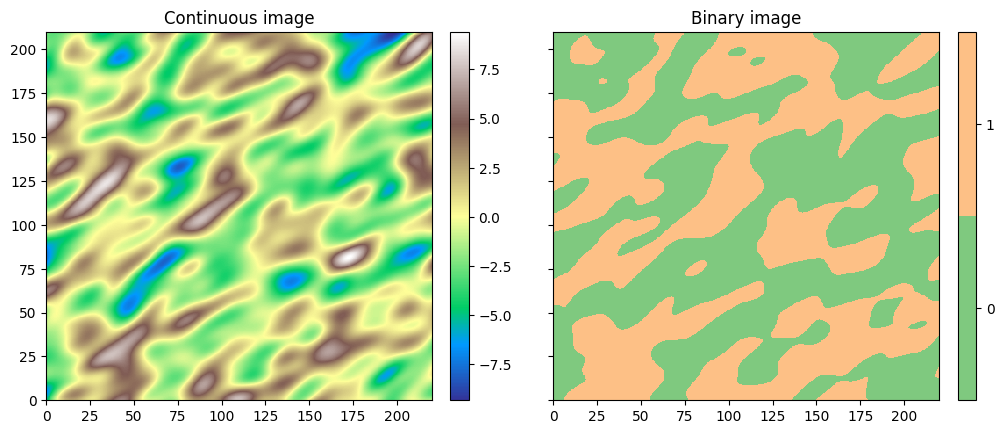

In [3]:
# Simulation
np.random.seed(222)
v = gn.grf.grf2D(cov_model, (nx, ny), (dx, dy), (ox, oy), nreal=1) 

# Define image containing the simulation
im_cont = gn.img.Img(nx, ny, 1, dx, dy, 1., ox, oy, 0., nv=1, val=v) # fill image (Img class from geone.img)

# Define the binary image
im_bin = gn.img.Img(nx, ny, 1, dx, dy, 1., ox, oy, 0., nv=1, val=(v>0))

# Display images 
col_bin = ['#7fc97f', '#fdc086']
plt.subplots(1,2,figsize=(12,8), sharey=True)

plt.subplot(1,2,1)
gn.imgplot.drawImage2D(im_cont, cmap='terrain', title='Continuous image')

plt.subplot(1,2,2)
gn.imgplot.drawImage2D(im_bin, categ=True, categVal=[0,1], categCol=col_bin, title='Binary image')

plt.show()

### Variogram

On these images (for example the continuous one), one can compute a variogram, and plot it like a map with the function  `imgTwoPointStatisticsImage` with the input argument `stat_type='variogram'`). Note that other functions (like *correlograms* or *transiogram*) can be computed with this same function.


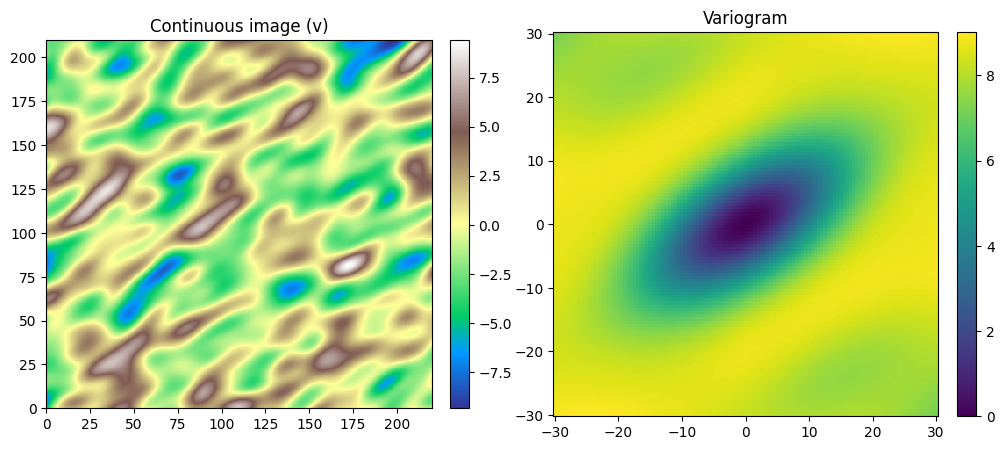

In [4]:
im_cont_vario = gn.geosclassicinterface.imgTwoPointStatisticsImage(im_cont,
                    hx_min=-60, hx_max=60, hy_min=-60, hy_max=60, stat_type='variogram')

# Plot
plt.subplots(1,2,figsize=(12,5))

# Plot the input image
plt.subplot(1,2,1)
gn.imgplot.drawImage2D(im_cont, cmap='terrain', title='Continuous image (v)')

# Plot the variogram map
plt.subplot(1,2,2)
gn.imgplot.drawImage2D(im_cont_vario, cmap='viridis', title='Variogram')

plt.show()

### Computing the "geobodies"

See the notebook `basic.ipynb` for more details.

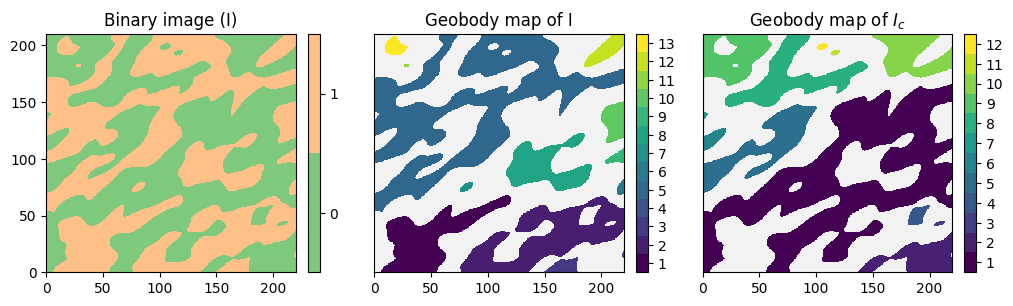

In [5]:
# Compute geobody map of the binary image
im_bin_geo = gn.geosclassicinterface.imgGeobodyImage(im_bin)
im_bin_c_geo = gn.geosclassicinterface.imgGeobodyImage(im_bin, complementary_set=True)

# Display images 
plt.subplots(1,3,figsize=(12,8))

plt.subplot(1,3,1)
gn.imgplot.drawImage2D(im_bin, categ=True, categVal=[0,1], categCol=col_bin, title='Binary image (I)')

plt.subplot(1,3,2)
gn.imgplot.drawImage2D(im_bin_geo, categ=True, categVal=np.arange(1,im_bin_geo.val.max()+1), 
                       yticks=[], title='Geobody map of I')
# value 0 not included in categVal so that it is not displayed

plt.subplot(1,3,3)
gn.imgplot.drawImage2D(im_bin_c_geo, categ=True, categVal=np.arange(1,im_bin_c_geo.val.max()+1), 
                       yticks=[], title='Geobody map of $I_c$')

plt.show()

### Connectivity analysis: ''connectogram''

See the corresponding section on the notebook `basic.ipynb`.

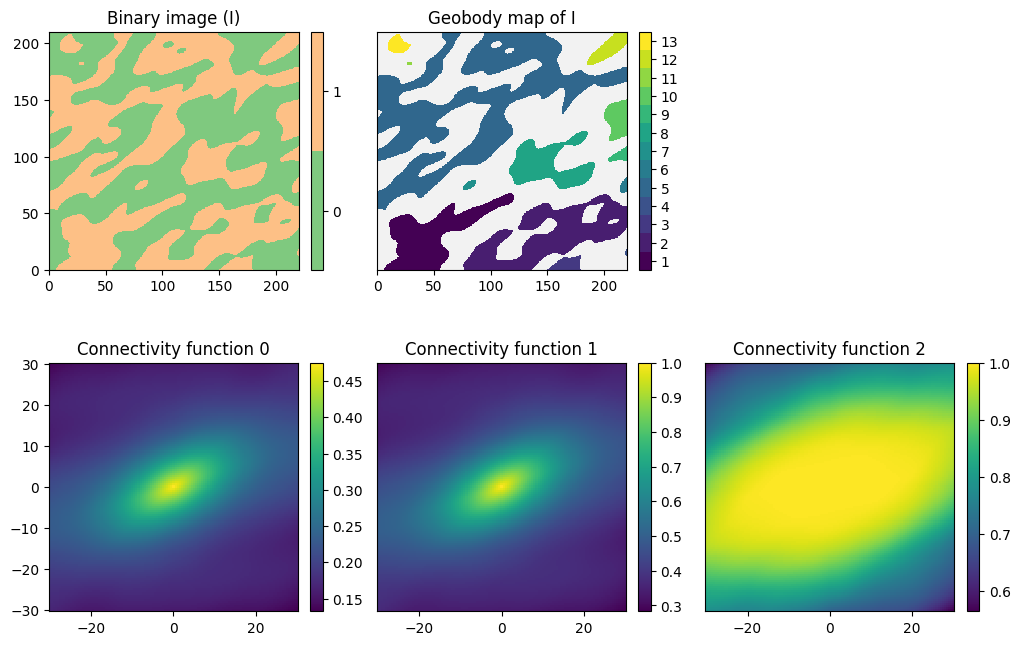

In [6]:
# Compute connectivity functions for the binary image im_bin
im_bin_geo = gn.geosclassicinterface.imgGeobodyImage(im_bin) # geobody image (already computed)

im_bin_connect0 = gn.geosclassicinterface.imgTwoPointStatisticsImage(im_bin_geo,
                    hx_min=-60, hx_max=60, hy_min=-60, hy_max=60, stat_type='connectivity_func0')
im_bin_connect1 = gn.geosclassicinterface.imgTwoPointStatisticsImage(im_bin_geo,
                    hx_min=-60, hx_max=60, hy_min=-60, hy_max=60, stat_type='connectivity_func1')
im_bin_connect2 = gn.geosclassicinterface.imgTwoPointStatisticsImage(im_bin_geo,
                    hx_min=-60, hx_max=60, hy_min=-60, hy_max=60, stat_type='connectivity_func2')

# Display images 
plt.subplots(2,3,figsize=(12,8))

plt.subplot(2,3,1)
gn.imgplot.drawImage2D(im_bin, categ=True, categVal=[0,1], categCol=col_bin, title='Binary image (I)')

plt.subplot(2,3,2)
gn.imgplot.drawImage2D(im_bin_geo, categ=True, categVal=np.arange(1,im_bin_geo.val.max()+1),
                       yticks=[], title='Geobody map of I')

plt.subplot(2,3,3)
plt.axis('off')

plt.subplot(2,3,4)
gn.imgplot.drawImage2D(im_bin_connect0, cmap='viridis', title='Connectivity function 0')

plt.subplot(2,3,5)
gn.imgplot.drawImage2D(im_bin_connect1, cmap='viridis', yticks=[], title='Connectivity function 1')

plt.subplot(2,3,6)
gn.imgplot.drawImage2D(im_bin_connect2, cmap='viridis', yticks=[], title='Connectivity function 2')

plt.show()